# Probability Distributions and Gradient Descent
## Part 1: Probability Distributions
### Example
A study conducted on 1000 patients shows that the average time for a patient to develop septic shock after a particular surgery is 12 hours.
What is the probability a patient will go into septic shock:

    a. Within 3 hours after surgery?
    b. 6 hours after surgery?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mean_time_to_shock = 12  # hours
rate_parameter = 1 / mean_time_to_shock  # 1/hours

num_samples = 10000  # Number of simulated patients
times_to_shock = np.random.exponential(scale=mean_time_to_shock, size=num_samples)

In [14]:
# a. Probability of septic shock within the first 2 hours:
time_of_interest_a = 2  # hours
probability_shock_before_toi_a = np.mean(times_to_shock < time_of_interest_a)

print(f"a. Probability of septic shock before {time_of_interest_a} hours: {probability_shock_before_toi_a}")

a. Probability of septic shock before 2 hours: 0.149


In [15]:
# b. Probability of septic shock after 6 hours:
time_of_interest_b = 6  # hours
probability_shock_after_toi_b = np.mean(times_to_shock > time_of_interest_b)

print(f"b. Probability of septic shock after {time_of_interest_b} hours: {probability_shock_after_toi_b}")

b. Probability of septic shock after 6 hours: 0.6114


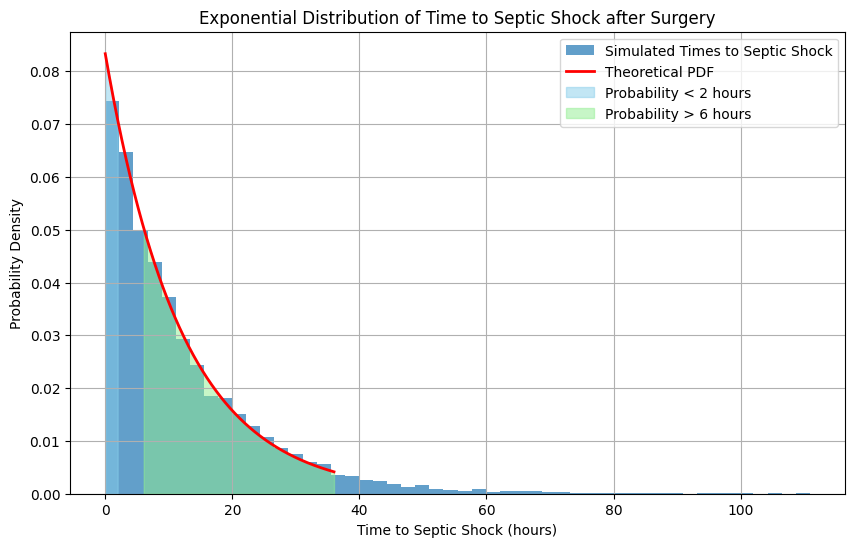

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(times_to_shock, bins=50, density=True, alpha=0.7, label="Simulated Times to Septic Shock")

x = np.linspace(0, 3 * mean_time_to_shock, 500)
pdf = rate_parameter * np.exp(-rate_parameter * x)
plt.plot(x, pdf, 'r-', linewidth=2, label="Theoretical PDF")

plt.xlabel("Time to Septic Shock (hours)")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution of Time to Septic Shock after Surgery")
plt.legend()
plt.grid(True)

# Highlight areas for both probabilities
plt.fill_between(x, pdf, where=(x <= time_of_interest_a), color='skyblue', alpha=0.5, label=f"Probability < {time_of_interest_a} hours")
plt.fill_between(x, pdf, where=(x > time_of_interest_b), color='lightgreen', alpha=0.5, label=f"Probability > {time_of_interest_b} hours")

plt.legend()  # Update legend after fill_between calls

plt.show()

### Report Insights

A. *How does the distribution you were allocated vary from the other three you were not allocated?*

1. **Type Of Data:**
    - Exponential: Deals with continuous data, specifically time until an event occurs.
    - Normal: Also deals with continuous data, but it describes data that is symmetrically distributed around a mean.
    - Binomial: Deals with discrete data, specifically the number of successes in a fixed number of independent trials. 
    - Poisson: Deals with discrete data, specifically the number of events that occur in a fixed interval of time or space. It's used for counting events like the number of website visitors in an hour.
2. **Shape of Graph:**
    - Exponential: A reverse J-shaped distribution. It's highest at zero and decays exponentially.
    - Normal: A mountain-shapped, symmetrical distribution. It's centered around the mean, and the data is evenly distributed on either side.
    - Binomial: A mountain-shaped, likey assymetrical distribution. The symmetry and skewness depend on the probability of success.
    - Poisson: Also takes mountain-shape, but it's typically skewed to the right, especially when the average number of events is small.
3. **Use Cases:**
    - Exponential: Time until a patient develops a septic shock after surgery.
    - Normal: Heights of people.
    - Binomial: Number of tails in 5 coin flips.
    - Poisson: Number of emergency calls in an hour.

B. *Would the question you chose be used in the context of a different distribution?*

* **Normal Distribution:**  The normal distribution is inappropriate for this scenario for several reasons:
    - Time-to-event data is skewed:  Times until an event like septic shock are almost always positively skewed (more patients develop it sooner, fewer later). The normal distribution is symmetrical.
    - Time-to-event data is non-negative: Time cannot be negative. The normal distribution extends to negative infinity.
    - Conceptual mismatch: The normal distribution describes the distribution of measurements or values around a mean. It doesn't inherently model the Ttime until something happens.

* **Binomial Distribution:** The binomial distribution is used for counting the number of successes in a fixed number of trials.  It has nothing to do with time.  You could not reframe the septic shock scenario to fit a binomial distribution.  

* **Poisson Distribution:** The Poisson distribution counts the number of events that occur within a fixed interval of time or space.  While it's related to the exponential, it's not suitable for our specific scenario.  The Poisson distribution would be appropriate if you wanted to model the number of cases of septic shock that occur in a hospital per day or per month.
  
**In short:** The nature of the "time until" a patient develops septic shock makes it inherently a time-to-event problem.  The exponential distribution is designed specifically for this type of data.  The normal, binomial, and Poisson distributions are designed for different types of data and different scenarios.

## Part 2: Bayesian Probability
### Fraud Detection Using Bayesian Probability

we'll use **Bayesian probability** to detect fraudulent transactions. We'll start with a prior probability of fraud and update it step-by-step as we observe new evidence

### Step 1: Initial Observation (High Transaction Amount)

We start with the following probabilities:
- **Prior Probability of Fraud (\( P(F) \))**: 1% (0.01).
- **Likelihood of High Amount Given Fraud (\( P(T|F) \))**: 90% (0.90).
- **Likelihood of High Amount Given No Fraud (\( P(T|\neg F) \))**: 5% (0.05).

Using Bayes' theorem, we calculate the **posterior probability of fraud** given a high transaction amount.


In [ ]:
def bayes_update(prior, likelihood_fraud, likelihood_non_fraud):
    marginal_likelihood = (likelihood_fraud * prior) + (likelihood_non_fraud * (1 - prior))
    posterior = (likelihood_fraud * prior) / marginal_likelihood
    return posterior, marginal_likelihood

P_F = 0.01
P_T_given_F = 0.90
P_T_given_not_F = 0.05
posterior_T, P_T = bayes_update(P_F, P_T_given_F, P_T_given_not_F)
print(f"Step 1: Posterior after High Amount = {posterior_T:.4f}")

### Step 2: Second Observation (High-Risk Location)

Now, we observe that the transaction occurred in a **high-risk location**. We update our posterior probability using the previous posterior as the new prior.

The new probabilities are:
- **Likelihood of High-Risk Location Given Fraud (\( P(L|F) \))**: 80% (0.80).
- **Likelihood of High-Risk Location Given No Fraud (\( P(L|\neg F) \))**: 10% (0.10).

In [ ]:
P_L_given_F = 0.80
P_L_given_not_F = 0.10
posterior_L, P_L = bayes_update(posterior_T, P_L_given_F, P_L_given_not_F)
print(f"Step 2: Posterior after High-Risk Location = {posterior_L:.4f}")


### Step 3: Third Observation (Unusual Hours)

Finally, we observe that the transaction occurred **outside the user's usual spending hours**. We update the posterior probability again using the previous posterior as the new prior.

The new probabilities are:
- **Likelihood of Unusual Hours Given Fraud (\( P(H|F) \))**: 70% (0.70).
- **Likelihood of Unusual Hours Given No Fraud (\( P(H|\neg F) \))**: 5% (0.05).

In [2]:
P_H_given_F = 0.70
P_H_given_not_F = 0.05
posterior_H, P_H = bayes_update(posterior_L, P_H_given_F, P_H_given_not_F)
print(f"Step 3: Posterior after Unusual Hours = {posterior_H:.4f}")

### Practical Significance of Bayesian Inference.

- Bayesian inference allows us to incorporate prior beliefs or existing knowledge into our analysis. This is particularly useful when we have historical data. In fraud detection, we might know that only 1% of transactions are fraudulent. This prior knowledge is combined with new evidence (e.g., high transaction amounts) to update our beliefs.

- It enables real-time decision-making as new data arrives. Bayesian inference updates probabilities as new evidence is observed. The posterior probability from one step becomes the prior for the next step.

- Bayesian inference provides a probabilistic framework that quantifies uncertainty. Instead of giving a binary answer (e.g., fraud or not fraud), it provides a probability (e.g., 95% chance of fraud). It helps decision-makers understand the confidence level of predictions.

# Part 3: Gradient Descent in Code 
implementing gradient descent in Python to optimize the parameters m (slope) and b (intercept) for a simple linear regression model.
### 1.Initialize Parameters:

In [2]:
# Initialize parameters
m = -1  # Initial slope
b = 1   # Initial intercept
alpha = 0.1  # Learning rate
points = np.array([[1, 3], [3, 6]])  # Given data points (x, y)
n = len(points)  # Number of data points

### 2.Define the Cost Function and Gradients:

In [3]:
# Function to compute gradients for m and b
def compute_gradients(m, b, points):
    x = points[:, 0]  # Extract x values from the data points
    y = points[:, 1]  # Extract y values from the data points
    y_pred = m * x + b  # Compute predicted y values using current m and b
    dm = (-2/n) * np.sum((y - y_pred) * x)  # Gradient for m
    db = (-2/n) * np.sum(y - y_pred)  # Gradient for b
    return dm, db

# Function to compute the cost (Mean Squared Error)
def compute_cost(m, b, points):
    x = points[:, 0]  # Extract x values
    y = points[:, 1]  # Extract y values
    y_pred = m * x + b  # Compute predicted y values
    cost = (1/n) * np.sum((y - y_pred) ** 2)  # Mean Squared Error
    return cost

### 3.Gradient Descent Implementation:

In [4]:
# Gradient Descent function with stopping condition
def gradient_descent(m, b, points, alpha, tolerance=1e-5, max_iterations=1000):
    m_history = []  # To store the history of m values
    b_history = []  # To store the history of b values
    cost_history = []  # To store the history of cost values
    previous_cost = float('inf')  # Initialize previous cost as infinity
    
    # Iterate for a maximum of max_iterations
    for iteration in range(max_iterations):
        # Compute gradients for m and b
        dm, db = compute_gradients(m, b, points)
        
        # Update m and b using gradient descent
        m = m - alpha * dm
        b = b - alpha * db
        
        # Compute the current cost (MSE)
        current_cost = compute_cost(m, b, points)
        
        # Append current values to history lists
        m_history.append(m)
        b_history.append(b)
        cost_history.append(current_cost)
        
        # Check for convergence: If the change in cost is below the tolerance, stop.  
        # This means m and b are no longer changing significantly.

        if abs(previous_cost - current_cost) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
        
        # Update previous_cost for the next iteration
        previous_cost = current_cost
    
    # Return final values and history
    return m, b, m_history, b_history, cost_history

### 4.Run Gradient Descent:

In [5]:

# Set stopping condition parameters
tolerance = 1e-5  # Threshold for stopping condition (change in cost)
max_iterations = 100  # Maximum number of iterations to prevent infinite loops

# Run gradient descent
m_final, b_final, m_history, b_history, cost_history = gradient_descent(m, b, points, alpha, tolerance, max_iterations)

# Print final values of m and b
print(f"Final slope (m): {m_final}")
print(f"Final intercept (b): {b_final}")

Converged after 81 iterations.
Final slope (m): 1.4891914492674805
Final intercept (b): 1.5260941497680465


### 5.Visualize the Changes in `m and b`:

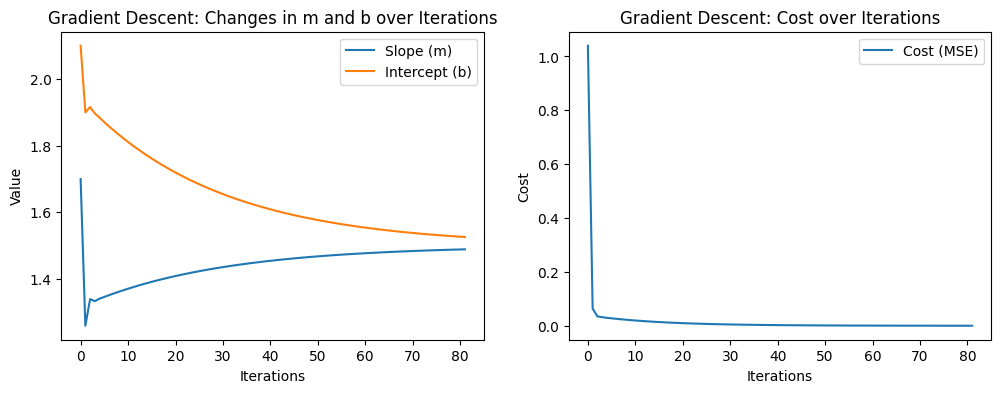

In [6]:
# Visualize the changes in m, b, and cost over iterations
plt.figure(figsize=(12, 4))

# Plot m and b over iterations
plt.subplot(1, 2, 1)
plt.plot(m_history, label='Slope (m)')
plt.plot(b_history, label='Intercept (b)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Gradient Descent: Changes in m and b over Iterations')
plt.legend()

# Plot cost (MSE) over iterations
plt.subplot(1, 2, 2)
plt.plot(cost_history, label='Cost (MSE)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost over Iterations')
plt.legend()

plt.show()

### 6.Compute Final Predictions:

In [7]:
# Compute final predictions using the final values of m and b
x_values = points[:, 0]  # Extract x values from the data points
y_pred_final = m_final * x_values + b_final  # Compute final predictions
print("Final Predictions:", y_pred_final)

Final Predictions: [3.0152856 5.9936685]



### **Graph 1 (Left): Gradient Descent: Changes in m and b over Iterations**
This graph tracks how the **slope (\(m\))** and **intercept (\(b\))** evolve over iterations.

#### **Observations:**
1. **Initial sharp change:**  
   - The values of \(m\) (blue line) and \(b\) (orange line) change rapidly in the first few iterations.  
   - This happens because gradient descent takes large steps initially when the cost is high.
  
2. **Gradual stabilization:**  
   - As iterations increase, both \(m\) and \(b\) start flattening out, indicating that they are converging to optimal values.

3. **Final values approaching a solution:**  
   - The graph shows that \(m\) and \(b\) are no longer changing significantly, meaning gradient descent has found a near-optimal solution.

🔹 **Key takeaway:**  
The algorithm is learning the best fit for \(m\) and \(b\) by minimizing the cost function.

---

### **Graph 2 (Right): "Gradient Descent: Cost over Iterations"**
This graph shows how the **cost function (Mean Squared Error, MSE)** decreases over time.

#### **Observations:**
1. **High initial cost:**  
   - At the start, the cost is high because the initial values of \(m\) and \(b\) are far from optimal.

2. **Rapid decrease in cost:**  
   - The cost drops sharply in the first few iterations as gradient descent makes large updates.

3. **Convergence (flattening curve):**  
   - After several iterations, the cost stabilizes and no longer decreases significantly.
   - This means the algorithm has found a near-optimal solution.

🔹 **Key takeaway:**  
The cost function is decreasing as the model learns, proving that gradient descent is successfully optimizing the parameters.

---

### **Overall Interpretation**
- The left graph shows how the **parameters (\(m\) and \(b\))** are adjusting.
- The right graph shows how the **error is decreasing**, proving that the model is learning.
- Together, they confirm that gradient descent is working correctly and finding the best fit.
  Result:
```
Final Predictions: [3.0152856  5.9936685]
```
- When \( x = 1 \), \( y \approx 3.015 \) (close to the actual \( y = 3 \))
- When \( x = 3 \), \( y \approx 5.994 \) (close to the actual \( y = 6 \))

## Team members Insights

#### **Loue Sauveur Christian**:
- This activity helped me understand gradient descent better. Doing it manually was slow and detailed, but coding it in Python allowed me to run 100 iterations in seconds. Seeing how the algorithm could automatically stop when \( m \) and \( b \) stopped changing was a key improvement—no more guessing when to stop. The graphs showed how \( m \) and \( b \) stabilized and the cost decreased, proving the algorithm worked. It highlighted how coding makes complex tasks efficient and accurate.


#### **Christian Iradukunda Byiringiro**:
- This exercise provided key insights into probability distributions. It emphasized that there is a distribution most appropriate for each scenario, depending on the kind of data, question, and assumptions. Some distributions are related, for example, the Poisson and Exponential Distributions, but it is important to know when one is used versus the other. They can provide useful complementary information when used together.


#### **Leslie Isaro**:
- The exercise provides insights into Bayesian probability and its applications. I have learned to combine prior knowledge with new data to make decisions. It provides a probability rather than a binary answer, which helps someone understand the confidence level of predictions. The exercise also shows the importance of prior knowledge, as it improves the accuracy of the predictions made. We can also see that Bayesian models can adapt to changing data, which makes them suitable for dynamic environment

#### **Nicolas Muhigi**:
- I gained that with only just a few iterations, small adjustments improve on the accuracy of the models and early adjustments have the most impact.

#### **Loic Cyusa**:
- In this course i got a clear understanding of the bayesian probability which updates probabilities based on  new evidence so according to the fraud detection problem the bayesian probability helps us to assess the probability of fraud in transactions which insures financial security 
So as part of the fintech project im working on this course provided me with a clear understanding of how machine learning can be integrated in my project

Leslie Isaro : 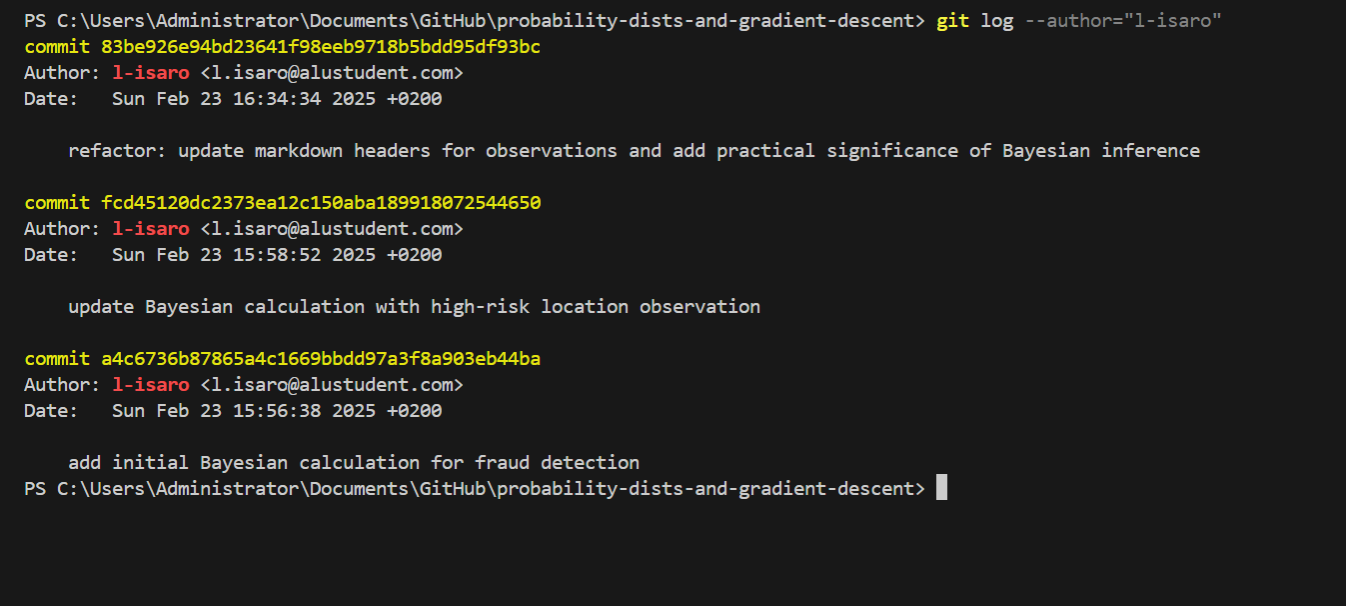
Christian Byiringiro: ![Christian commits.PNG](<attachment:Christian commits.PNG>)
Nicolas Muhigi : 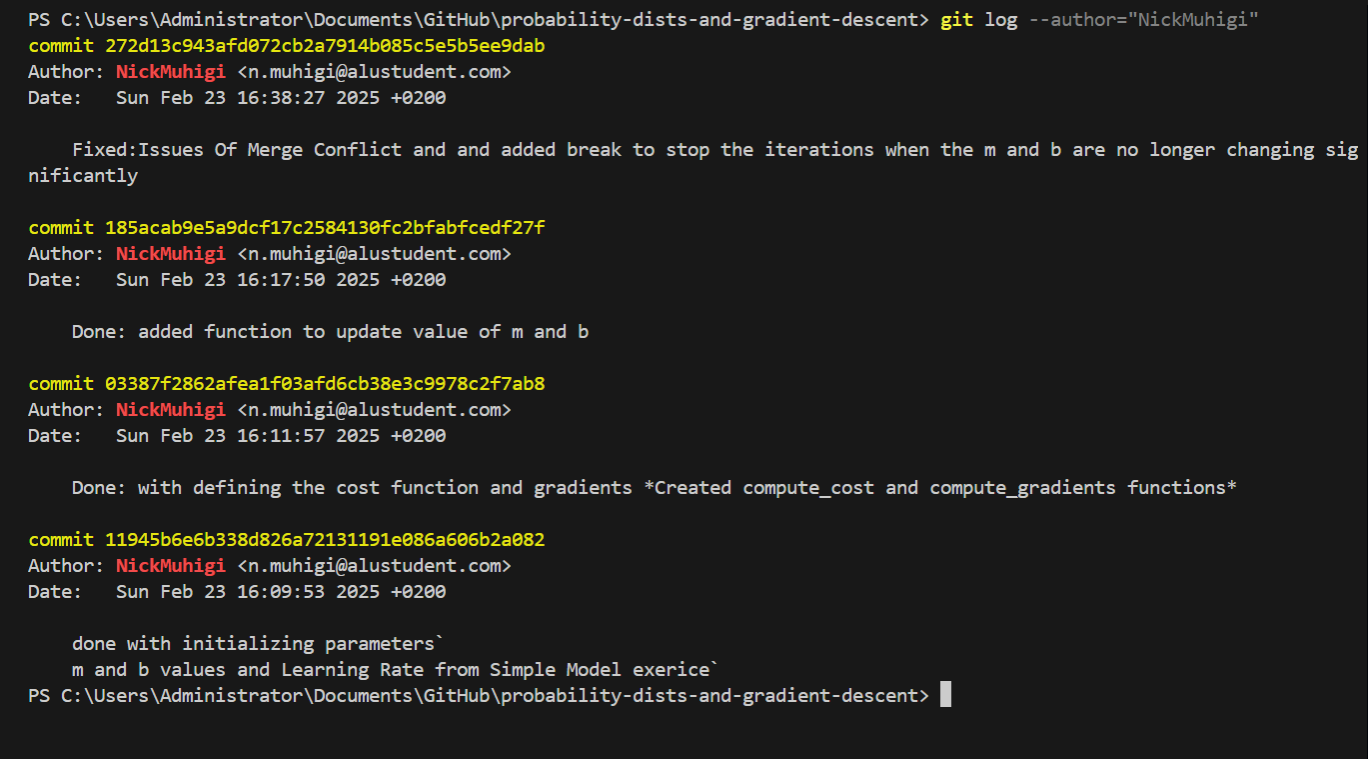
Loue Sauveur : 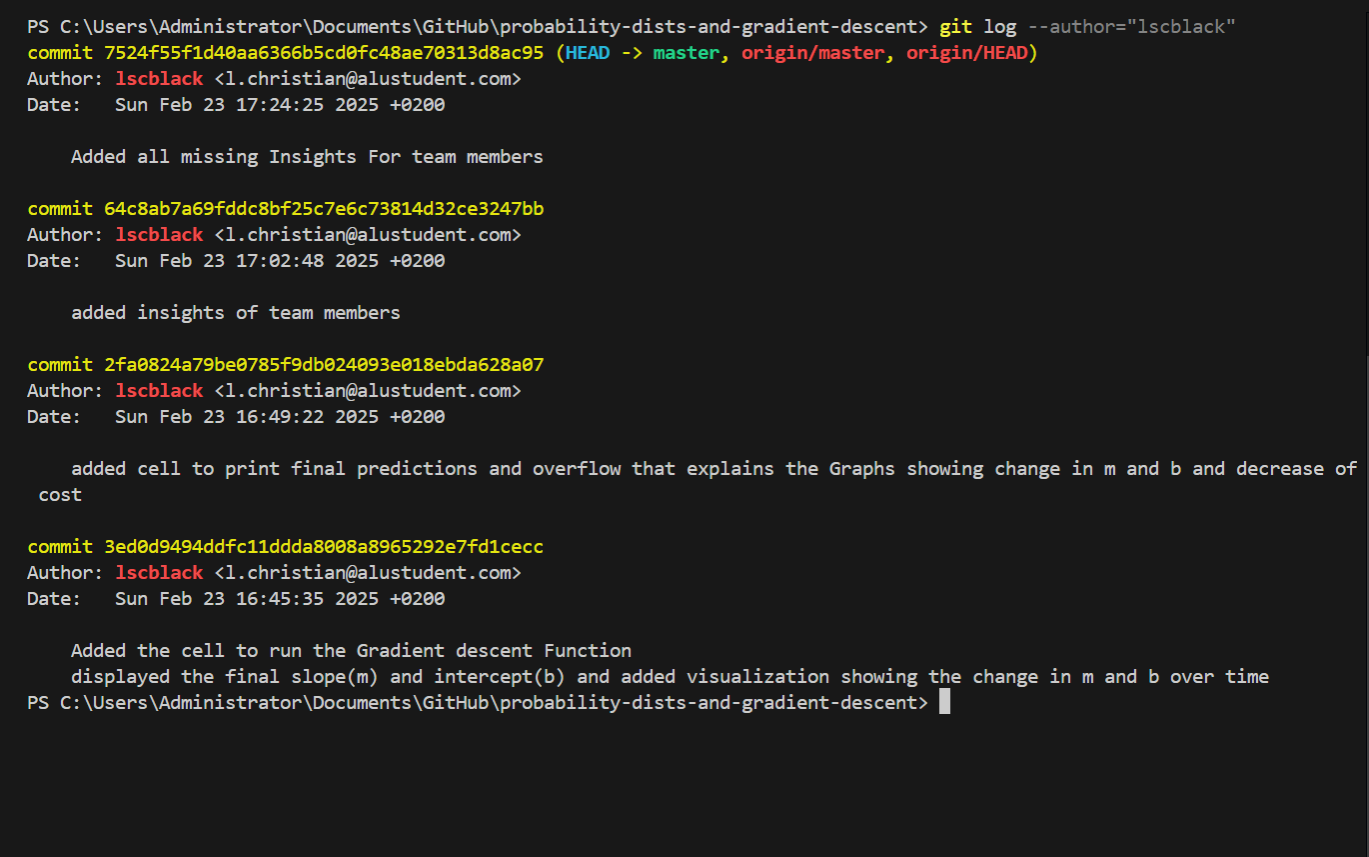
Cyusa Loic : 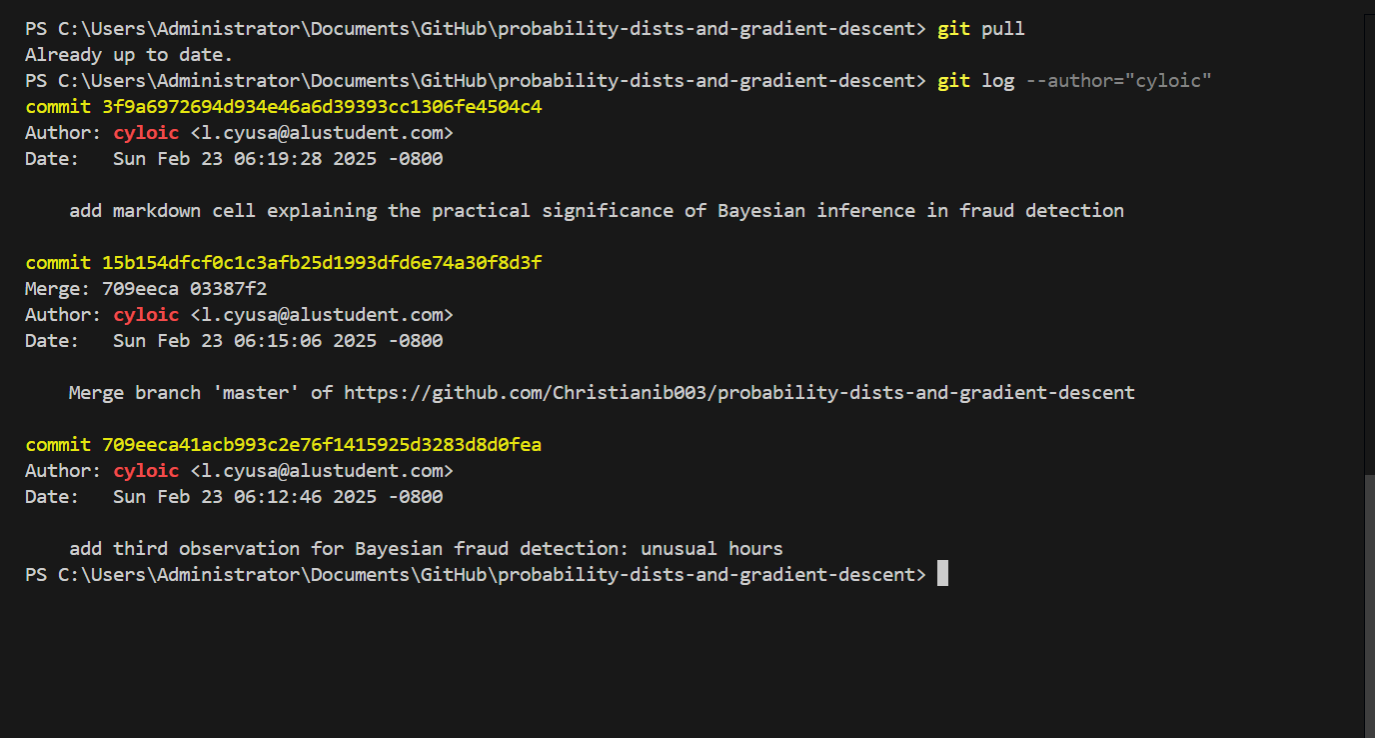
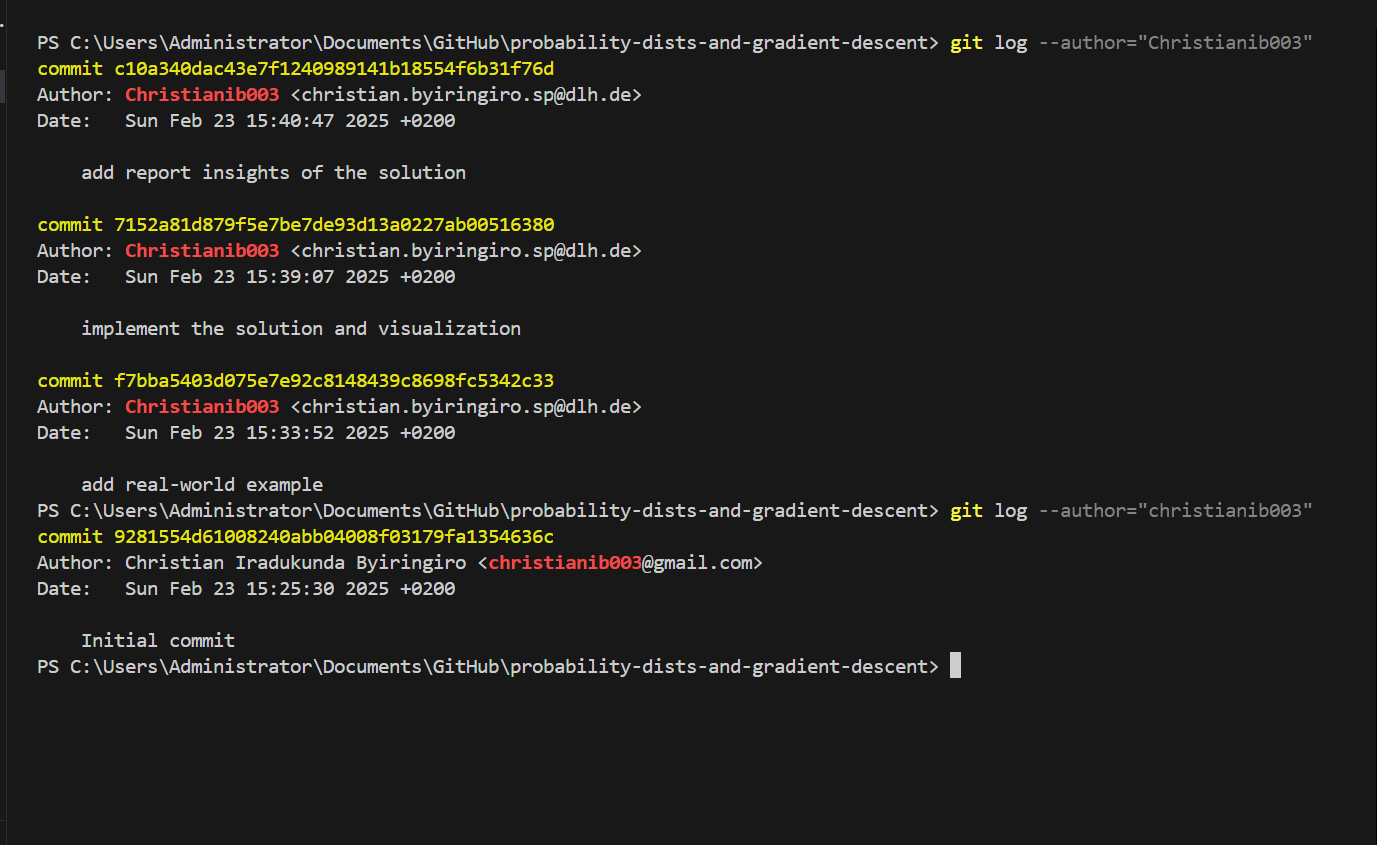